## Pump It Up
### ISA 330 

Starter **Notebook** 

Let's start with loading the data and taking a look at some of the records.

I'm going to be loading the data into a Pandas Dataframe, so I'll load that library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
import pandas as pd

# We were given 4 different files, so let's load each to see what we have.
train_df = pd.read_csv ('Pump_it_Up_Training_set_values.csv')
trainlabels_df = pd.read_csv ('Pump_it_Up_Training_set_labels.csv')
test_df = pd.read_csv ('Pump_it_Up_Test_set_values.csv')
submission_df = pd.read_csv ('Pump_it_Up_Submission_Format.csv')

#train_df.head()
#trainlabels_df.head()
#test_df.head()
#submission_df.head()


amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

num_private - 

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint

In [3]:
# The ... in our dataframe means that there are columns we are not showing (this means there are more than 20 columns).
# Let's set the max columns to unlimited.
pd.set_option('max_columns', None)

In [4]:
# Let's look at some basic statistics about each column.
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [5]:
trainlabels_df.describe()

,id
count,59400.000000
mean,37115.131768
std,21453.128371
min,0.000000
25%,18519.750000
50%,37061.500000
75%,55656.500000
max,74247.000000


In [6]:
test_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [7]:
submission_df.describe()

,id
count,14850.000000
mean,37161.972929
std,21359.364833
min,10.000000
25%,18727.000000
50%,37361.500000
75%,55799.750000
max,74249.000000


Well, I don't really want my target variable in a seperate dataframe, so I'll use a merge to combine the train_df and trainlabels_df.

In [8]:
train_df = trainlabels_df.merge(train_df, on='id')
train_df

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [9]:
status_clean = {"status_group": {"non functional": 0, "functional": 2, "functional needs repair": 1}}
                
train_df = train_df.replace(status_clean)
train_df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,2,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,2,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,2,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


Maybe next I'll figure out if I have any data that is missing (isnull) and figure out what I'll do with that data...

In [10]:
train_df.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

And here I will look at categorical data and see if it makes sense to keep it all. I want to look at low frequency occurrences because they often highlight bad data.

In [11]:
train_df.lga.value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [12]:
train_df.status_group.value_counts()

2    32259
0    22824
1     4317
Name: status_group, dtype: int64

In [13]:
train_df.funder.value_counts()

Government Of Tanzania          9084
Danida                          3114
Hesawa                          2202
Rwssp                           1374
World Bank                      1349
                                ... 
Panone                             1
Diocese Of Mount Kilimanjaro       1
Long Ga                            1
Mzee Lesilali                      1
Nerthlands                         1
Name: funder, Length: 1897, dtype: int64

In [14]:
train_df.installer.value_counts()

DWE                      17402
Government                1825
RWE                       1206
Commu                     1060
DANIDA                    1050
                         ...  
Ongan                        1
Upendo primary School        1
Swalehe Rajabu               1
District Community j         1
mwita                        1
Name: installer, Length: 2145, dtype: int64

Maybe I'll run a correlation matrix so I can find a) potential good predictors and b) highly similar columns that means I might want to use just one of the columns.

In [15]:
corrMatrix = train_df.corr()
print(corrMatrix)

                         id  status_group  amount_tsh  gps_height  longitude  \
id                 1.000000     -0.004049   -0.005321   -0.004692  -0.001348   
status_group      -0.004049      1.000000    0.053702    0.114029  -0.004366   
amount_tsh        -0.005321      0.053702    1.000000    0.076650   0.022134   
gps_height        -0.004692      0.114029    0.076650    1.000000   0.149155   
longitude         -0.001348     -0.004366    0.022134    0.149155   1.000000   
latitude           0.001718      0.014547   -0.052670   -0.035751  -0.425802   
num_private       -0.002629      0.005021    0.002944    0.007237   0.023873   
region_code       -0.003028     -0.108640   -0.026813   -0.183521   0.034197   
district_code     -0.003044     -0.065687   -0.023599   -0.171233   0.151398   
population        -0.002813      0.017759    0.016288    0.135003   0.086590   
construction_year -0.002082      0.043342    0.067915    0.658727   0.396732   

                   latitude  num_privat

# Analysis of Status Group

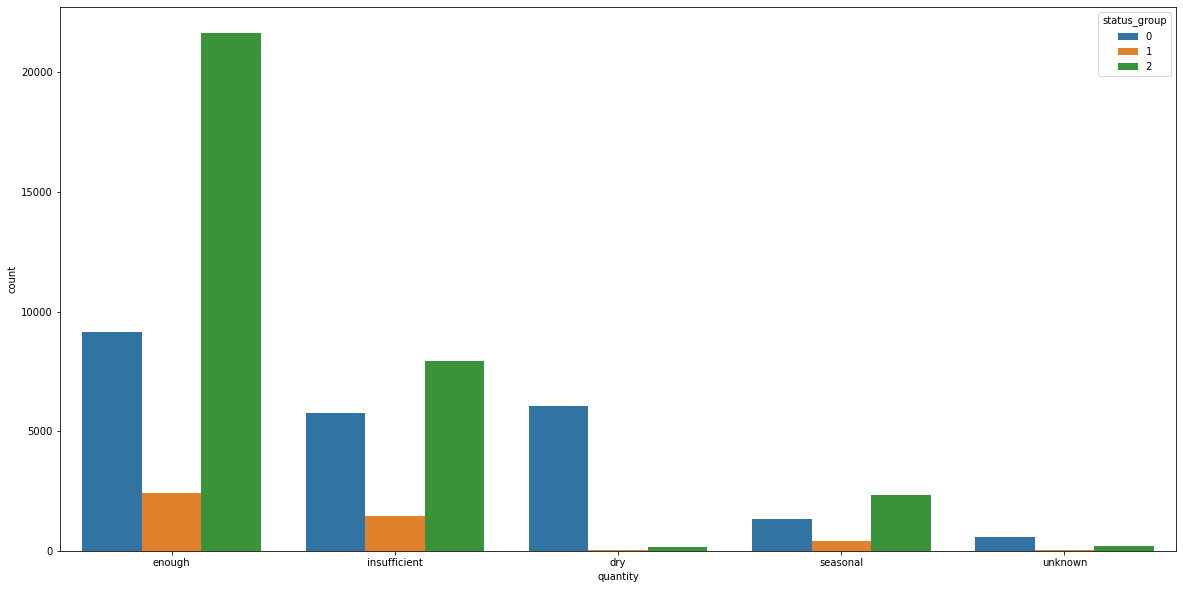

In [16]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='quantity', hue="status_group", data= train_df)

Functional pumps are most likely to have enough water quantity, while non functional pumps have less water quantity.

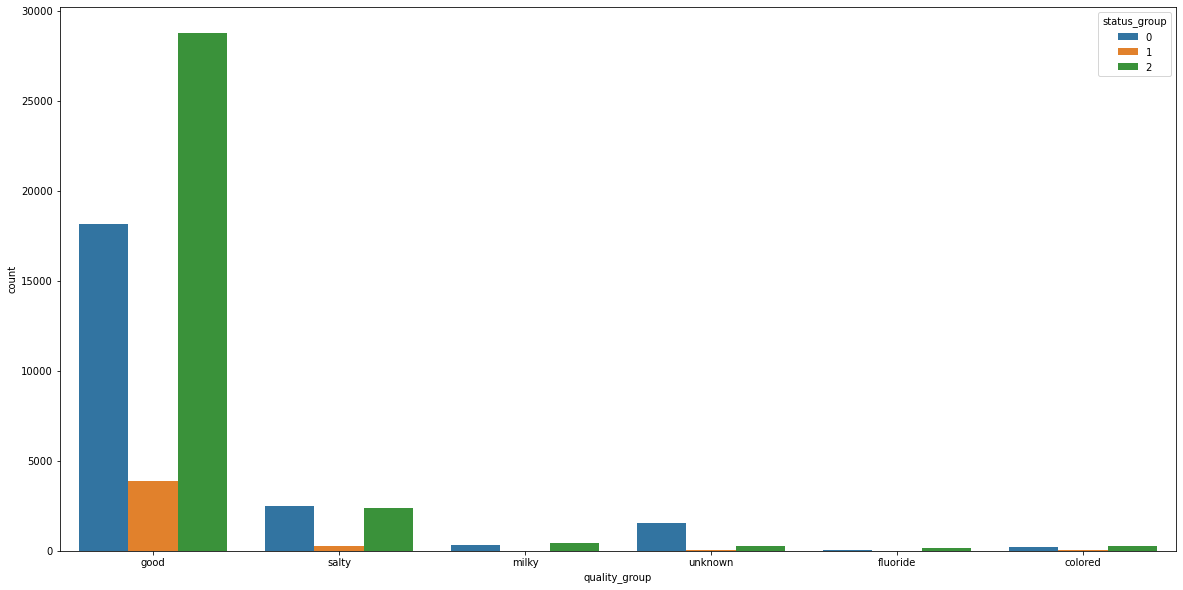

In [17]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='quality_group', hue="status_group", data= train_df)

This graph shows that the most functional water pumps have good quality water rather than poor quality. However, this graph also shows that even the no functional pumps have a majority of good quality water as well rather than poor quality. 

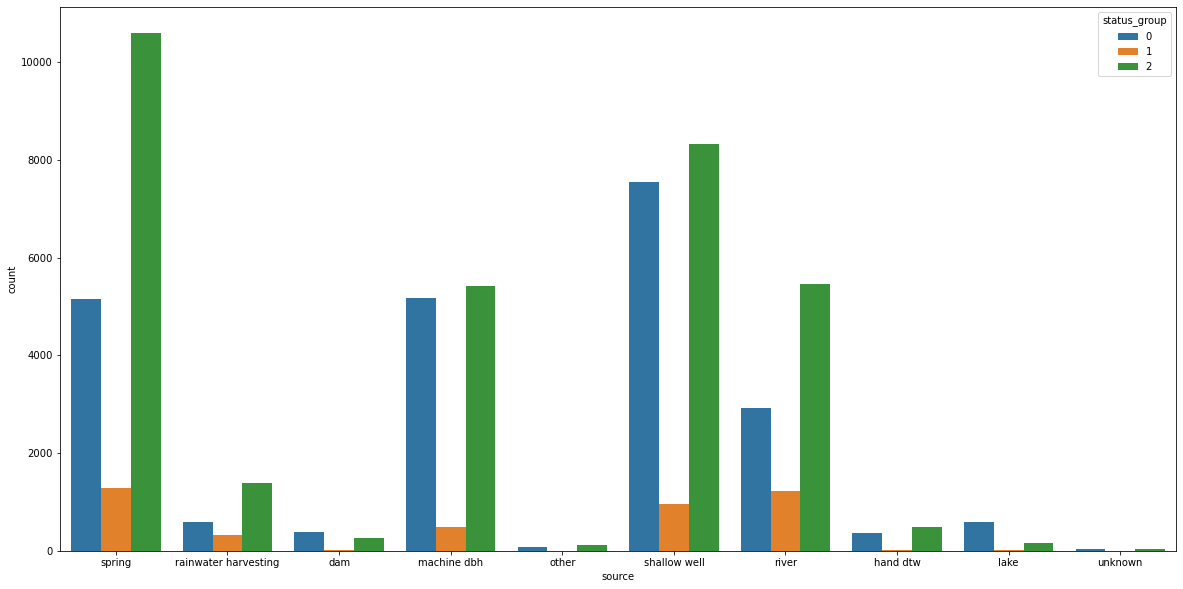

In [18]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data= train_df)

Greatest difference from functional and non functional when differentiating water source. Natural water is cleaner and safer for the pumps.

# Analysis of Payment

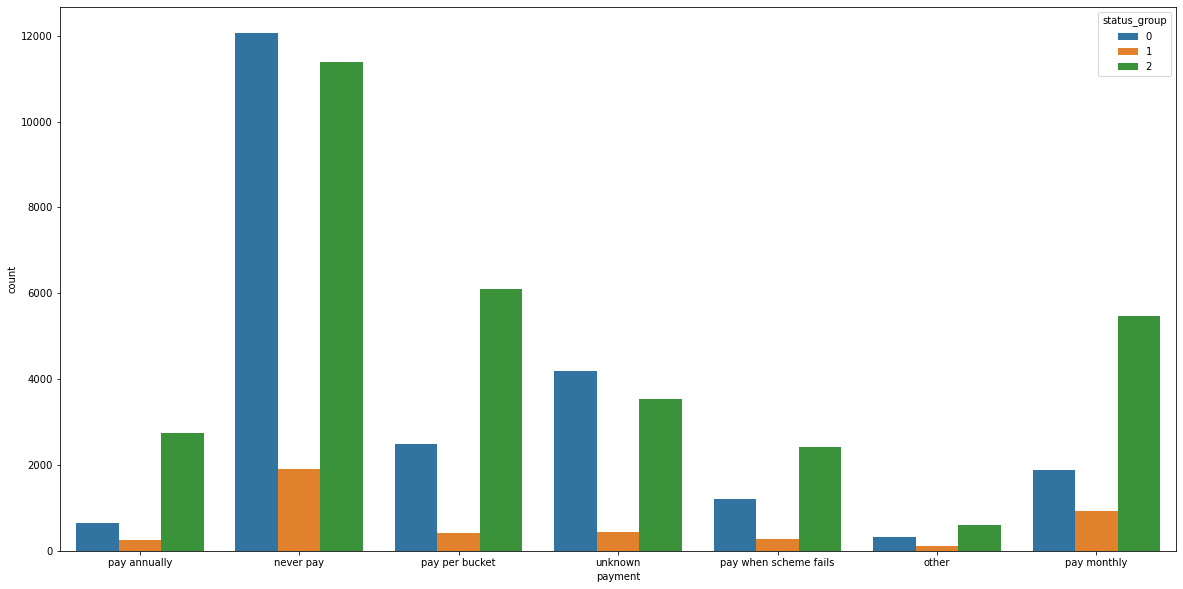

In [19]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data= train_df)

People who pay more often have more functional pumps than non functional pumps.

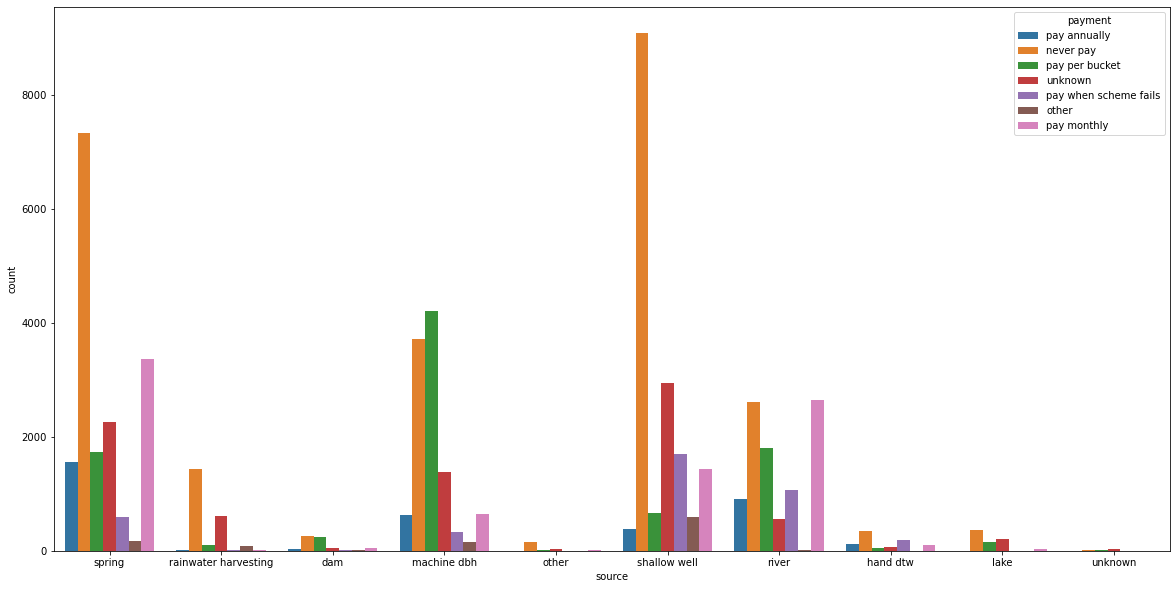

In [20]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="payment", data= train_df)

This histogram shows that there is a slight variation in our original hypothesis: the pumps that people paid for generally were more functional, which mostly if not fully includes natural water. This histogram shows that spring water and shallow wells are mostly never paid for, which is contradicting to our original findings.

# Visualizations Continued

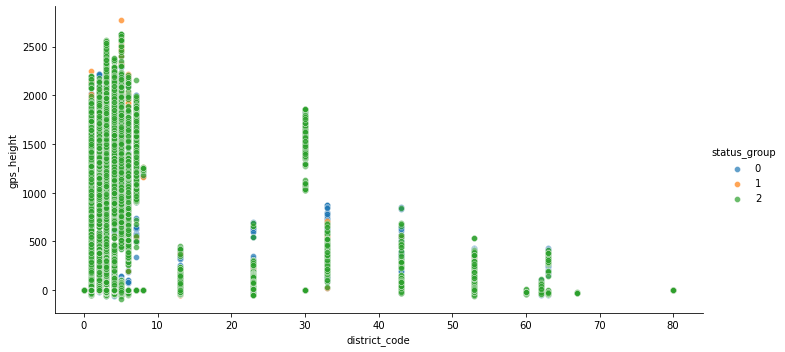

In [21]:
g = sns.FacetGrid (train_df, hue= "status_group", height=5, aspect=2)
g.map (sns.scatterplot, "district_code", "gps_height", alpha=.7)
g.add_legend()

This scatterplot shows the effects GPS Height (altitude) of water pumps has on the functionality of the pump related to the district code. District codes between 0 and 10 have the majority of the pumps, specifically, the larger altitude pumps.

<AxesSubplot:>

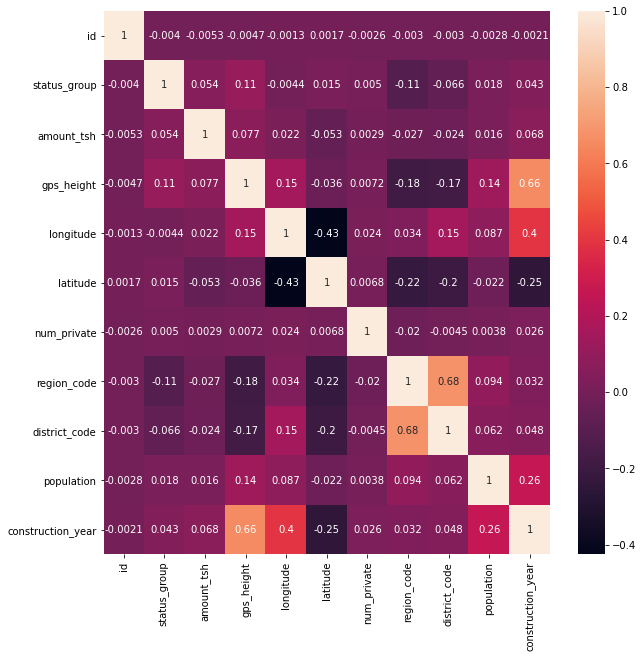

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)

This heat map helps identify multiple variations of groups such as construction_year and GPS_height which is 0.66 (a high corrolation), and status_group and GPS_height which has a correlation of 0.11 (not too low but not the highest).

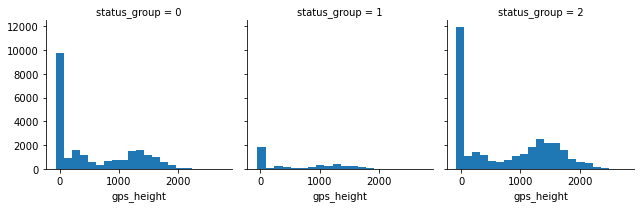

In [23]:
g = sns.FacetGrid(train_df, col='status_group')
g.map(plt.hist, 'gps_height', bins=20)

More functional pumps are more likely to have a GPS height of 1500. It looks like the data entry people who formed the csv put many entries for GPS height in as 0. 

# Interactive Map of Water Pumps

In [24]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [26]:
import folium

#collect long and lat data to map onto folium
map_of_locations = folium.Map(location=[-6.442167,35.0686], zoom_start = 5)

#change range to increase/ decrease number of pumps on map
for current_index in range(1,500):
    current_location_id = train_df.iloc[current_index][0]
    current_location_long = train_df.iloc[current_index][7]
    current_location_lat = train_df.iloc[current_index][8]
    
    current_location_function = train_df.iloc[current_index][1]
    #add location to map
    
    #add color
    if (train_df.iloc[current_index]["status_group"]==2): # Non Functional
            icon_color = "green"
    elif (train_df.iloc[current_index]["status_group"]==1): # Functional Needs Repair
            icon_color = "red"
    elif (train_df.iloc[current_index]["status_group"]==0): # Functional
            icon_color = "orange"
    else: 
            icon_color = "blue"
    folium.Marker(location=[current_location_lat, current_location_long], icon=folium.Icon(color=icon_color),
                  tooltip = current_location_id).add_to(map_of_locations)
    

map_of_locations

In [27]:
col_names = ['status_group', 'date_recorded', 'funder', 'region', 'region_code', 'district_code', 'lga', 'population', 'scheme_management', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type']
#train_df = pd.read_csv ('Pump_it_Up_Training_set_values.csv')
#train_df.head()
    

In [28]:
#status_group is not working
feature_cols = ['amount_tsh', 'region_code', 'district_code', 'construction_year']
X = train_df[feature_cols] # Features
y = train_df.population # Target variable

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [30]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
print(clf)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

DecisionTreeClassifier()


In [31]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5343995510662177


In [32]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


# Analyze Variables of Payment

In [34]:
dectree_df = train_df[['status_group', 'gps_height', 'payment_type']]

In [35]:
dectree_df.head()

,status_group,gps_height,payment_type
0,2,1390,annually
1,2,1399,never pay
2,2,686,per bucket
3,0,263,never pay
4,2,0,never pay


In [36]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree # Allows us to plot the tree

In [37]:
dectree_df.head()

,status_group,gps_height,payment_type
0,2,1390,annually
1,2,1399,never pay
2,2,686,per bucket
3,0,263,never pay
4,2,0,never pay


In [38]:
# If your categories have no logical order to them (one is greater than the other) then it is better to convert them to 
# dummy fields (logical values for each category)
dectree_df = pd.get_dummies(dectree_df, columns=["payment_type"])

In [39]:
dectree_df.head()

,status_group,gps_height,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown
0,2,1390,1,0,0,0,0,0,0
1,2,1399,0,0,1,0,0,0,0
2,2,686,0,0,0,0,0,1,0
3,0,263,0,0,1,0,0,0,0
4,2,0,0,0,1,0,0,0,0


In [40]:
# Now we can use this to run a basic decision tree.
Y_train = dectree_df.status_group
X_train = dectree_df.drop("status_group", axis=1)

feature_names = X_train.columns
labels = ['Non Functional', 'Functional Needs Repair', 'Functional']

In [41]:
clf = DecisionTreeClassifier(max_depth = 4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

In [42]:
clf.score(X_train, Y_train)

0.5919023569023569

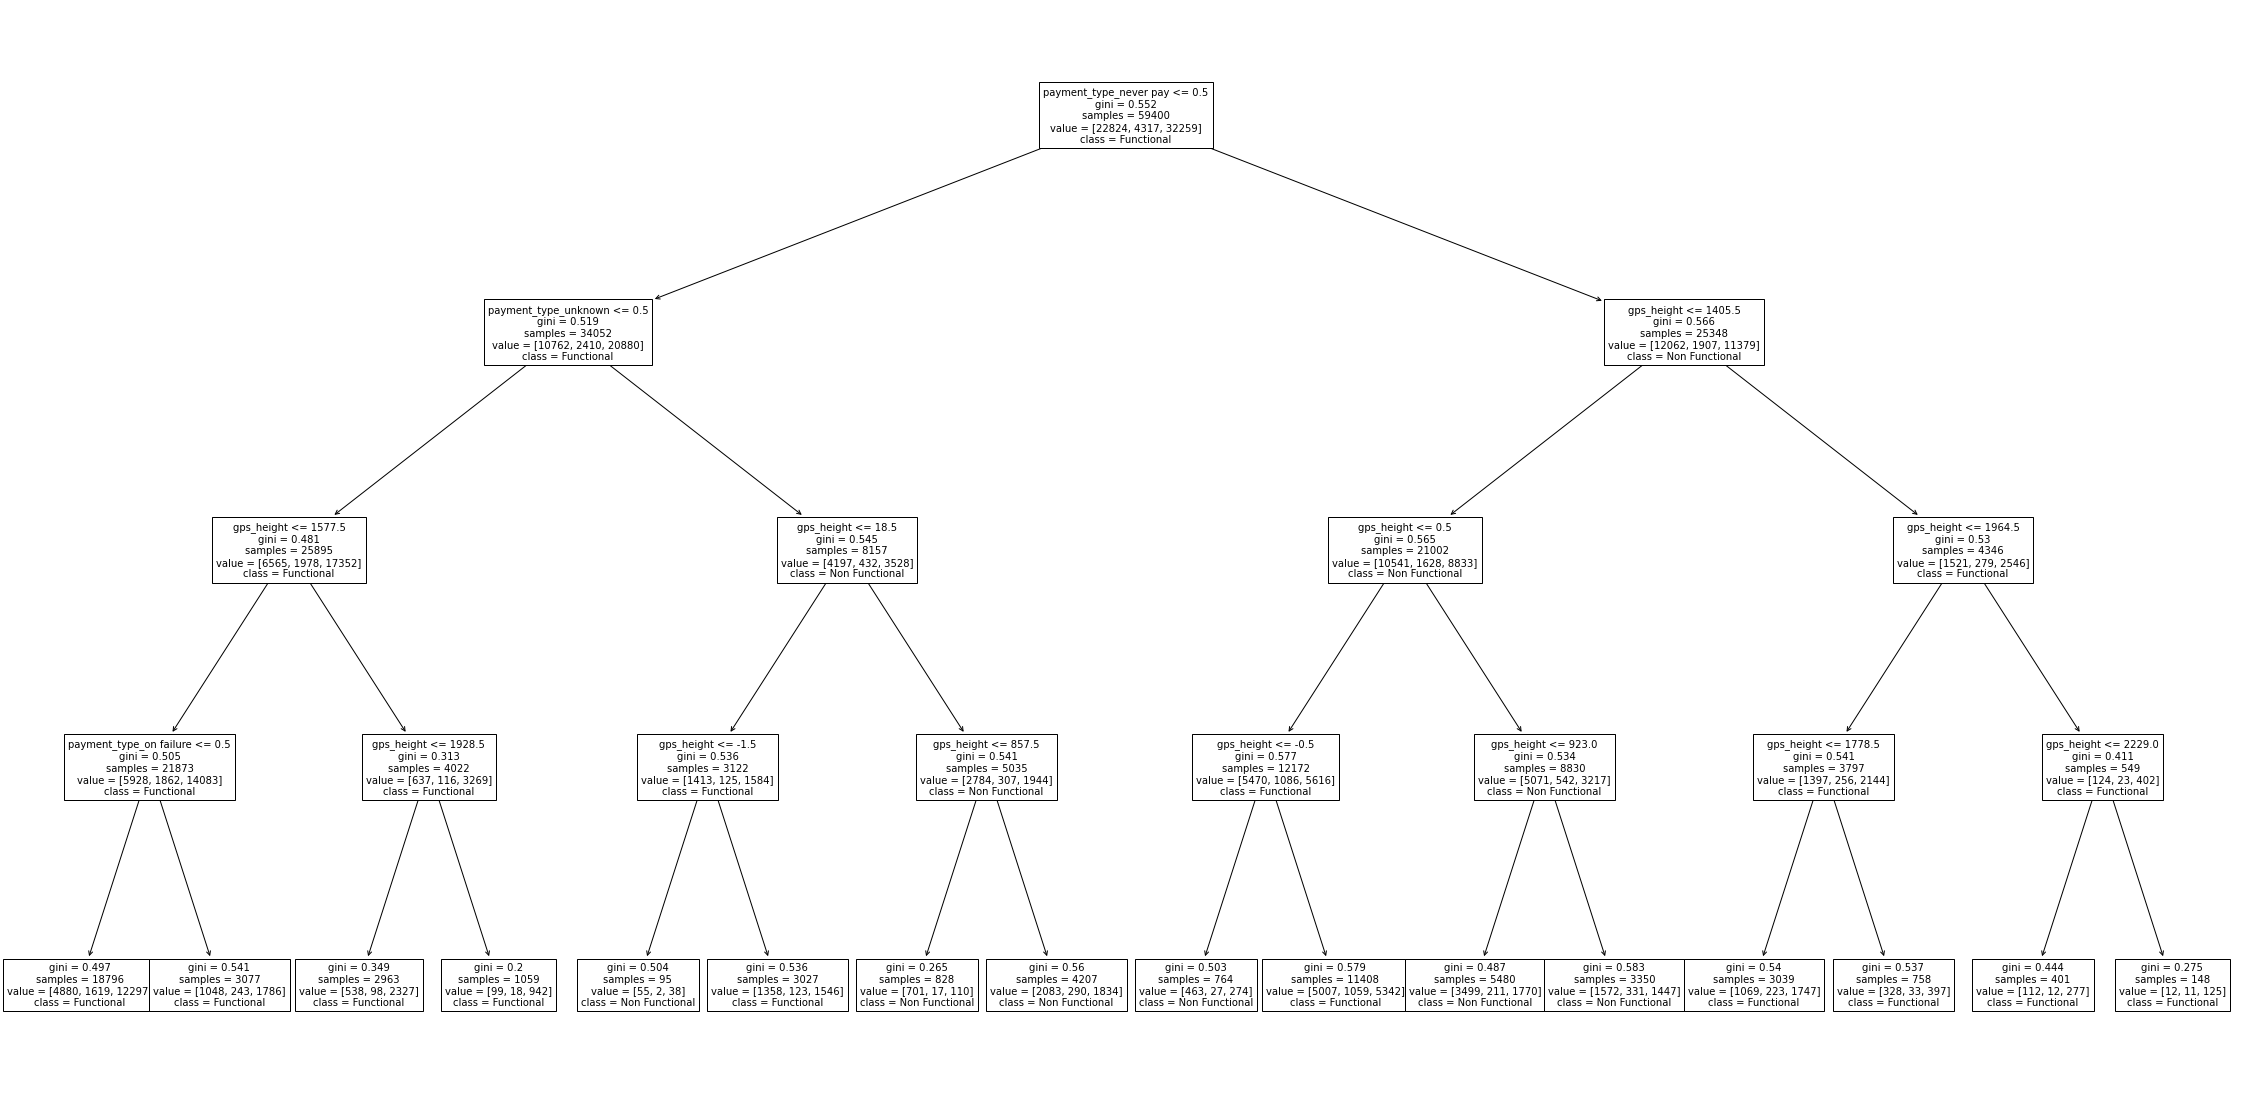

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20)) # Size in inches
tree.plot_tree(clf, fontsize=10, feature_names = feature_names, class_names = labels);
plt.show()

In [44]:
# First we have to get test to match train (only those two fields, split out, etc)
test_x = test_df[['gps_height', 'payment_type']]
test_x = pd.get_dummies(test_x, columns=["payment_type"])

test_out = clf.predict(test_x) # This gives us a list of predictions which we then have to pair up with the pump id

df = pd.DataFrame()
df['id'] = test_df.id
df['status_group'] = test_out

df.head()

,id,status_group
0,50785,2
1,51630,2
2,17168,2
3,45559,0
4,49871,2


As you can see in the decision tree, the pumps that are high above sea level as well as being paid for frequently, have a greater chance of being "functional" than pumps that are less frequently paid for/ not paid for at all.

# Analyze Variables of Public Approval

In [45]:
dectree_df = train_df[['status_group', 'district_code', 'population', 'public_meeting', 'permit']]

In [46]:
dectree_df.head()

,status_group,district_code,population,public_meeting,permit
0,2,5,109,True,False
1,2,2,280,NaN,True
2,2,4,250,True,True
3,0,63,58,True,True
4,2,1,0,True,True


In [47]:
dectree_df = pd.get_dummies(dectree_df, columns=["public_meeting"])

In [48]:
dectree_df = pd.get_dummies(dectree_df, columns=["permit"])

In [49]:
dectree_df.head()

,status_group,district_code,population,public_meeting_False,public_meeting_True,permit_False,permit_True
0,2,5,109,0,1,1,0
1,2,2,280,0,0,0,1
2,2,4,250,0,1,0,1
3,0,63,58,0,1,0,1
4,2,1,0,0,1,0,1


In [50]:
# Now we can use this to run a basic decision tree.
Y_train = dectree_df.status_group
X_train = dectree_df.drop("status_group", axis=1)

feature_names = X_train.columns
labels = ['Non Functional', 'Functional Needs Repair', 'Functional']

In [51]:
clf = DecisionTreeClassifier(max_depth = 4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

In [52]:
clf.score(X_train, Y_train)

0.568063973063973

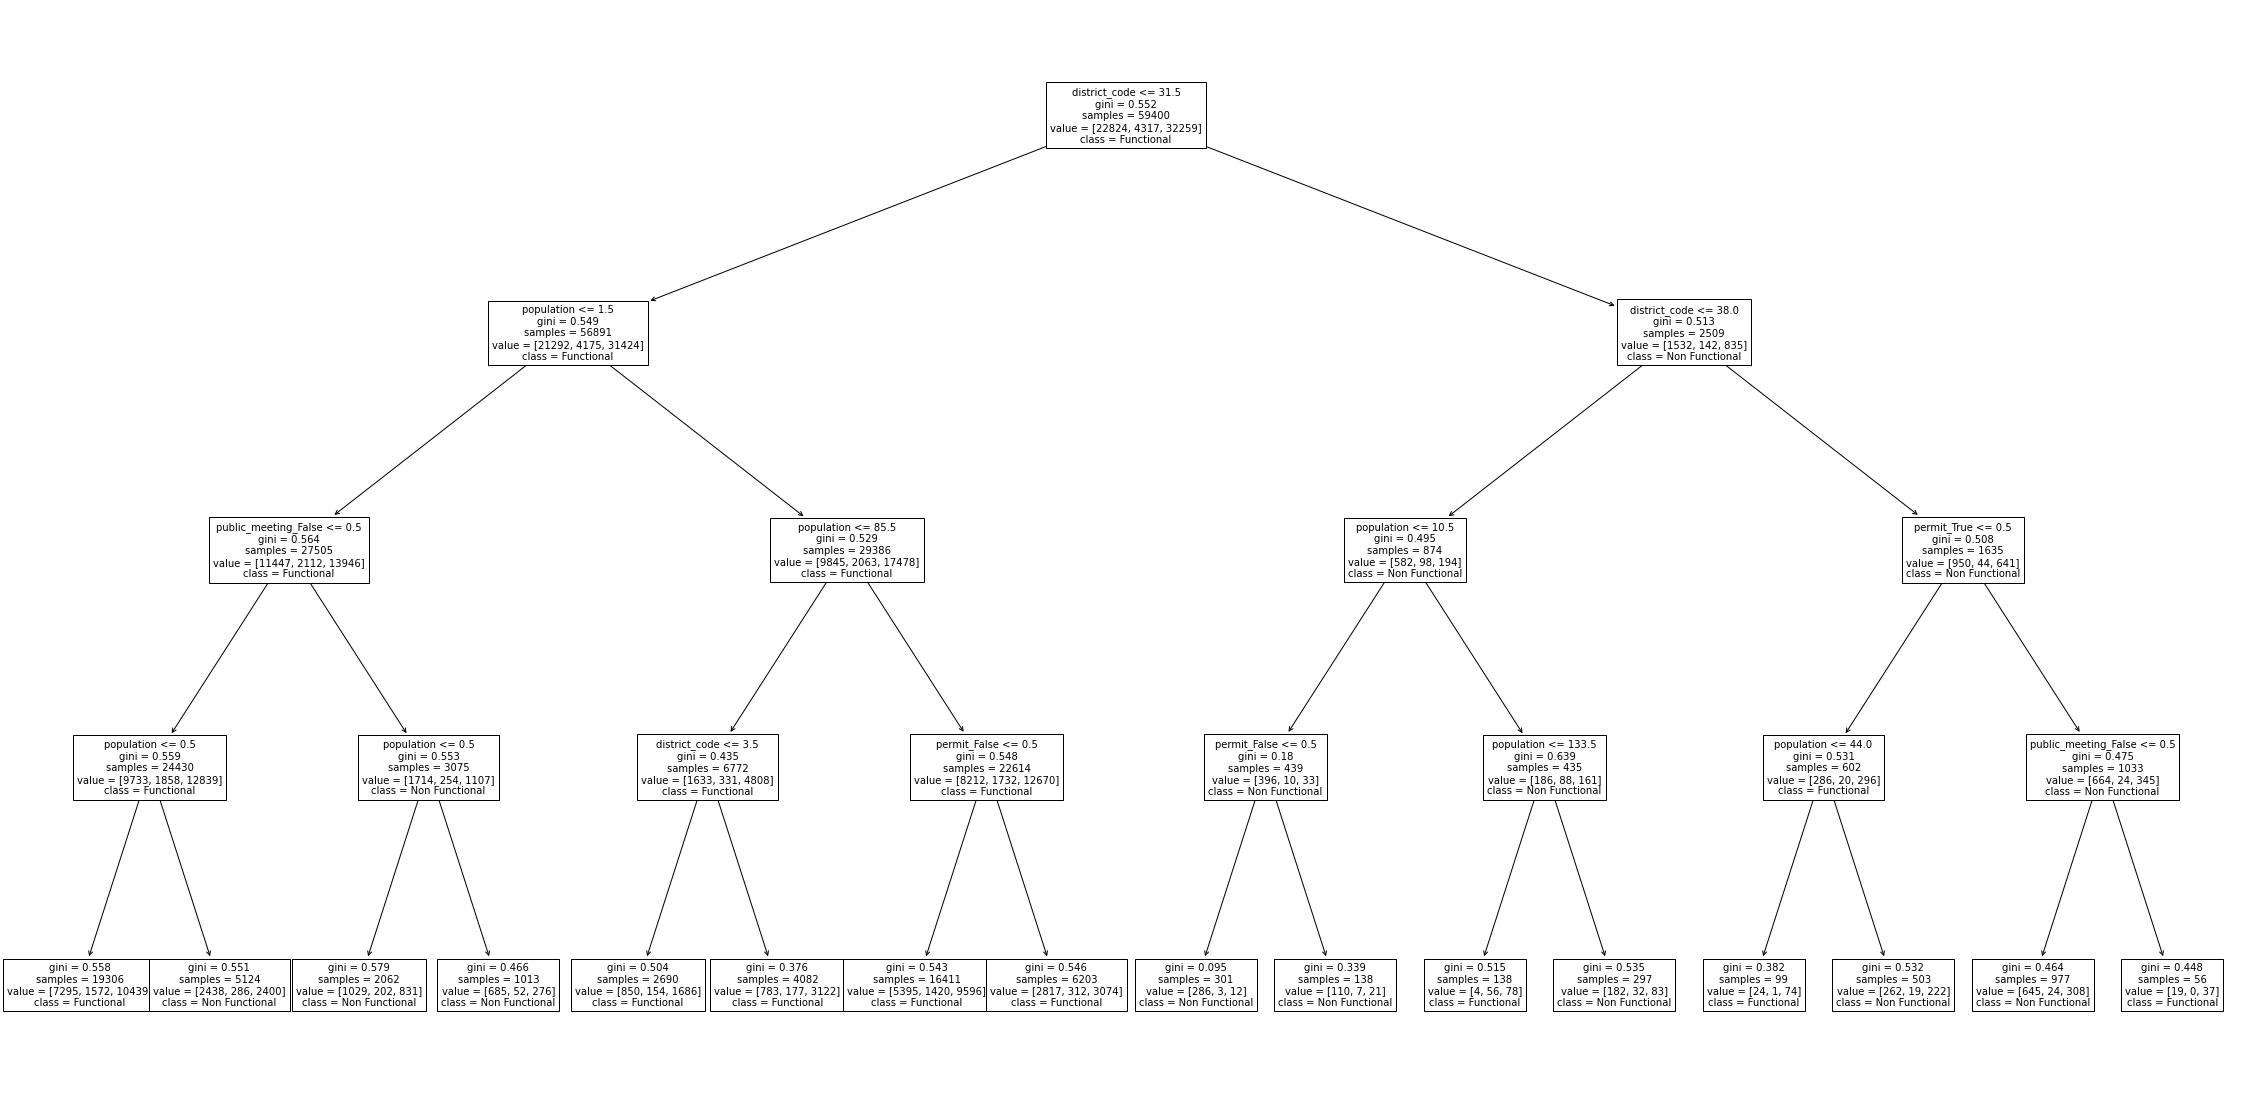

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20)) # Size in inches
tree.plot_tree(clf, fontsize=10, feature_names = feature_names, class_names = labels);
plt.show()

As you can see in this decision tree, we unexpectedly found that a permit existing for the water pump does nhot effect the functionality of the waterpump. There was an overwhelming 22,6014 sample size that did not have a permit, which raises the question of accuracy.

# Analyze Variables of Management

In [54]:
dectree_df = train_df[['status_group', 'construction_year', 'management', 'payment_type']]

In [55]:
dectree_df.head()

,status_group,construction_year,management,payment_type
0,2,1999,vwc,annually
1,2,2010,wug,never pay
2,2,2009,vwc,per bucket
3,0,1986,vwc,never pay
4,2,0,other,never pay


In [56]:
dectree_df = pd.get_dummies(dectree_df, columns=["management"])

In [57]:
dectree_df = pd.get_dummies(dectree_df, columns=["payment_type"])

In [58]:
dectree_df.head()

,status_group,construction_year,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown
0,2,1999,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,2,2010,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,2,2009,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1986,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [59]:
# Now we can use this to run a basic decision tree.
Y_train = dectree_df.status_group
X_train = dectree_df.drop("status_group", axis=1)

feature_names = X_train.columns
labels = ['Non Functional', 'Functional Needs Repair', 'Functional']

In [60]:
clf = DecisionTreeClassifier(max_depth = 4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

In [61]:
clf.score(X_train, Y_train)

0.6132491582491583

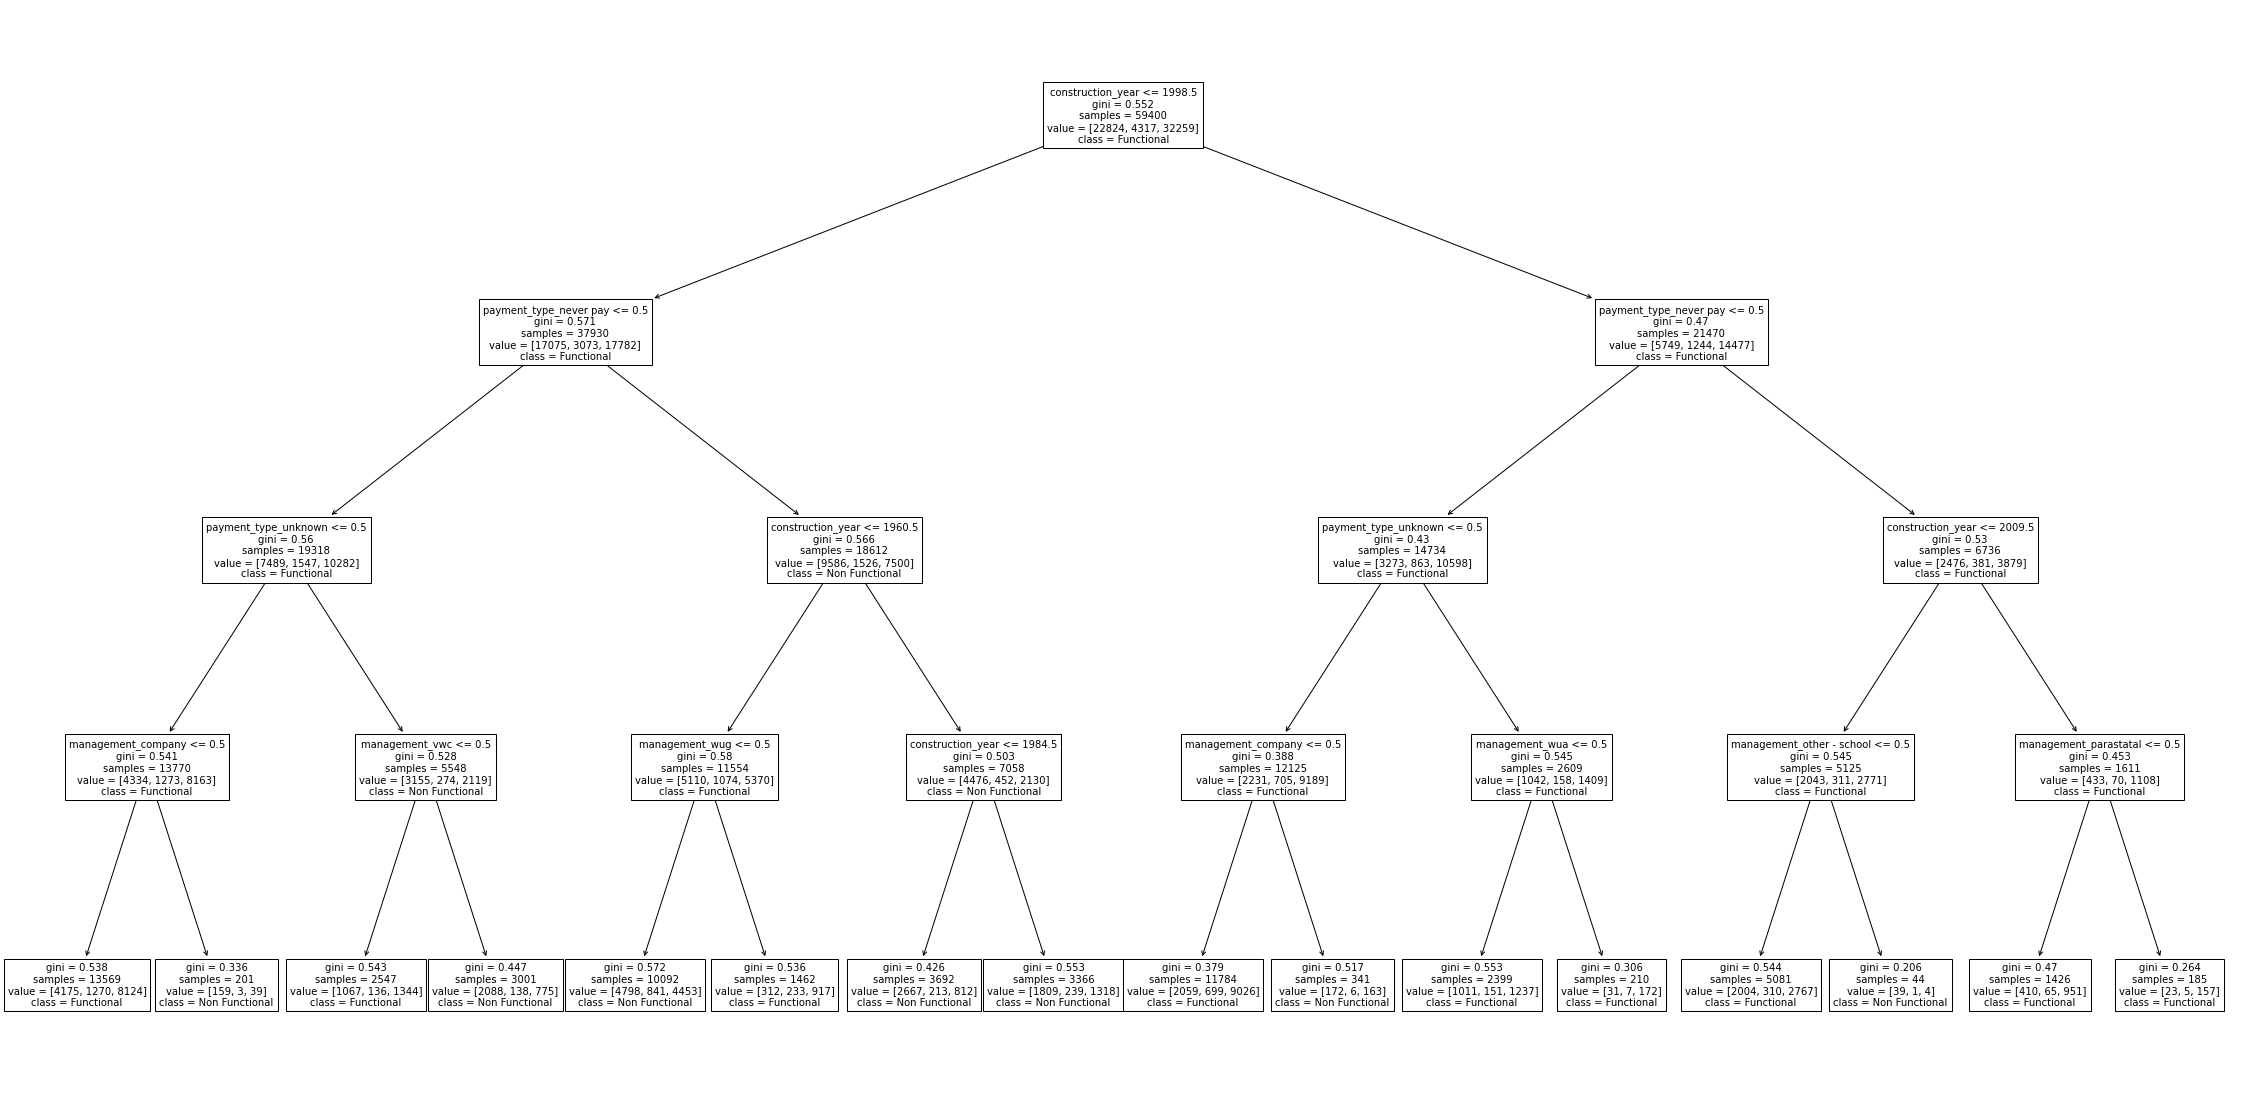

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20)) # Size in inches
tree.plot_tree(clf, fontsize=10, feature_names = feature_names, class_names = labels);
plt.show()

As you can see in the decision tree, it is apparent that older pumps are most likely not as functional as the newer pumps. VWC is also the largest group that manages the most pumps, however, there are a few pumps that are neglected and not paid for, therefore, none functional.

# Analyze Variables of Production/ Maintenance

In [63]:
dectree_df = train_df[['status_group', 'extraction_type', 'water_quality', 'quantity', 'source', 'source_class', 'waterpoint_type_group']]

In [64]:
dectree_df.head()

,status_group,extraction_type,water_quality,quantity,source,source_class,waterpoint_type_group
0,2,gravity,soft,enough,spring,groundwater,communal standpipe
1,2,gravity,soft,insufficient,rainwater harvesting,surface,communal standpipe
2,2,gravity,soft,enough,dam,surface,communal standpipe
3,0,submersible,soft,dry,machine dbh,groundwater,communal standpipe
4,2,gravity,soft,seasonal,rainwater harvesting,surface,communal standpipe


In [65]:
dectree_df = pd.get_dummies(dectree_df, columns=["extraction_type"])

In [66]:
dectree_df = pd.get_dummies(dectree_df, columns=["water_quality"])

In [67]:
dectree_df = pd.get_dummies(dectree_df, columns=["quantity"])

In [68]:
dectree_df = pd.get_dummies(dectree_df, columns=["source"])

In [69]:
dectree_df = pd.get_dummies(dectree_df, columns=["source_class"])

In [70]:
dectree_df = pd.get_dummies(dectree_df, columns=["waterpoint_type_group"])

In [71]:
dectree_df.head()

,status_group,extraction_type_afridev,extraction_type_cemo,extraction_type_climax,extraction_type_gravity,extraction_type_india mark ii,extraction_type_india mark iii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other - mkulima/shinyanga,extraction_type_other - play pump,extraction_type_other - rope pump,extraction_type_other - swn 81,extraction_type_submersible,extraction_type_swn 80,extraction_type_walimi,extraction_type_windmill,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [72]:
# Now we can use this to run a basic decision tree.
Y_train = dectree_df.status_group
X_train = dectree_df.drop("status_group", axis=1)

feature_names = X_train.columns
labels = ['Non Functional', 'Functional Needs Repair', 'Functional']

In [73]:
clf = DecisionTreeClassifier(max_depth = 4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

In [74]:
clf.score(X_train, Y_train)

0.6988047138047138

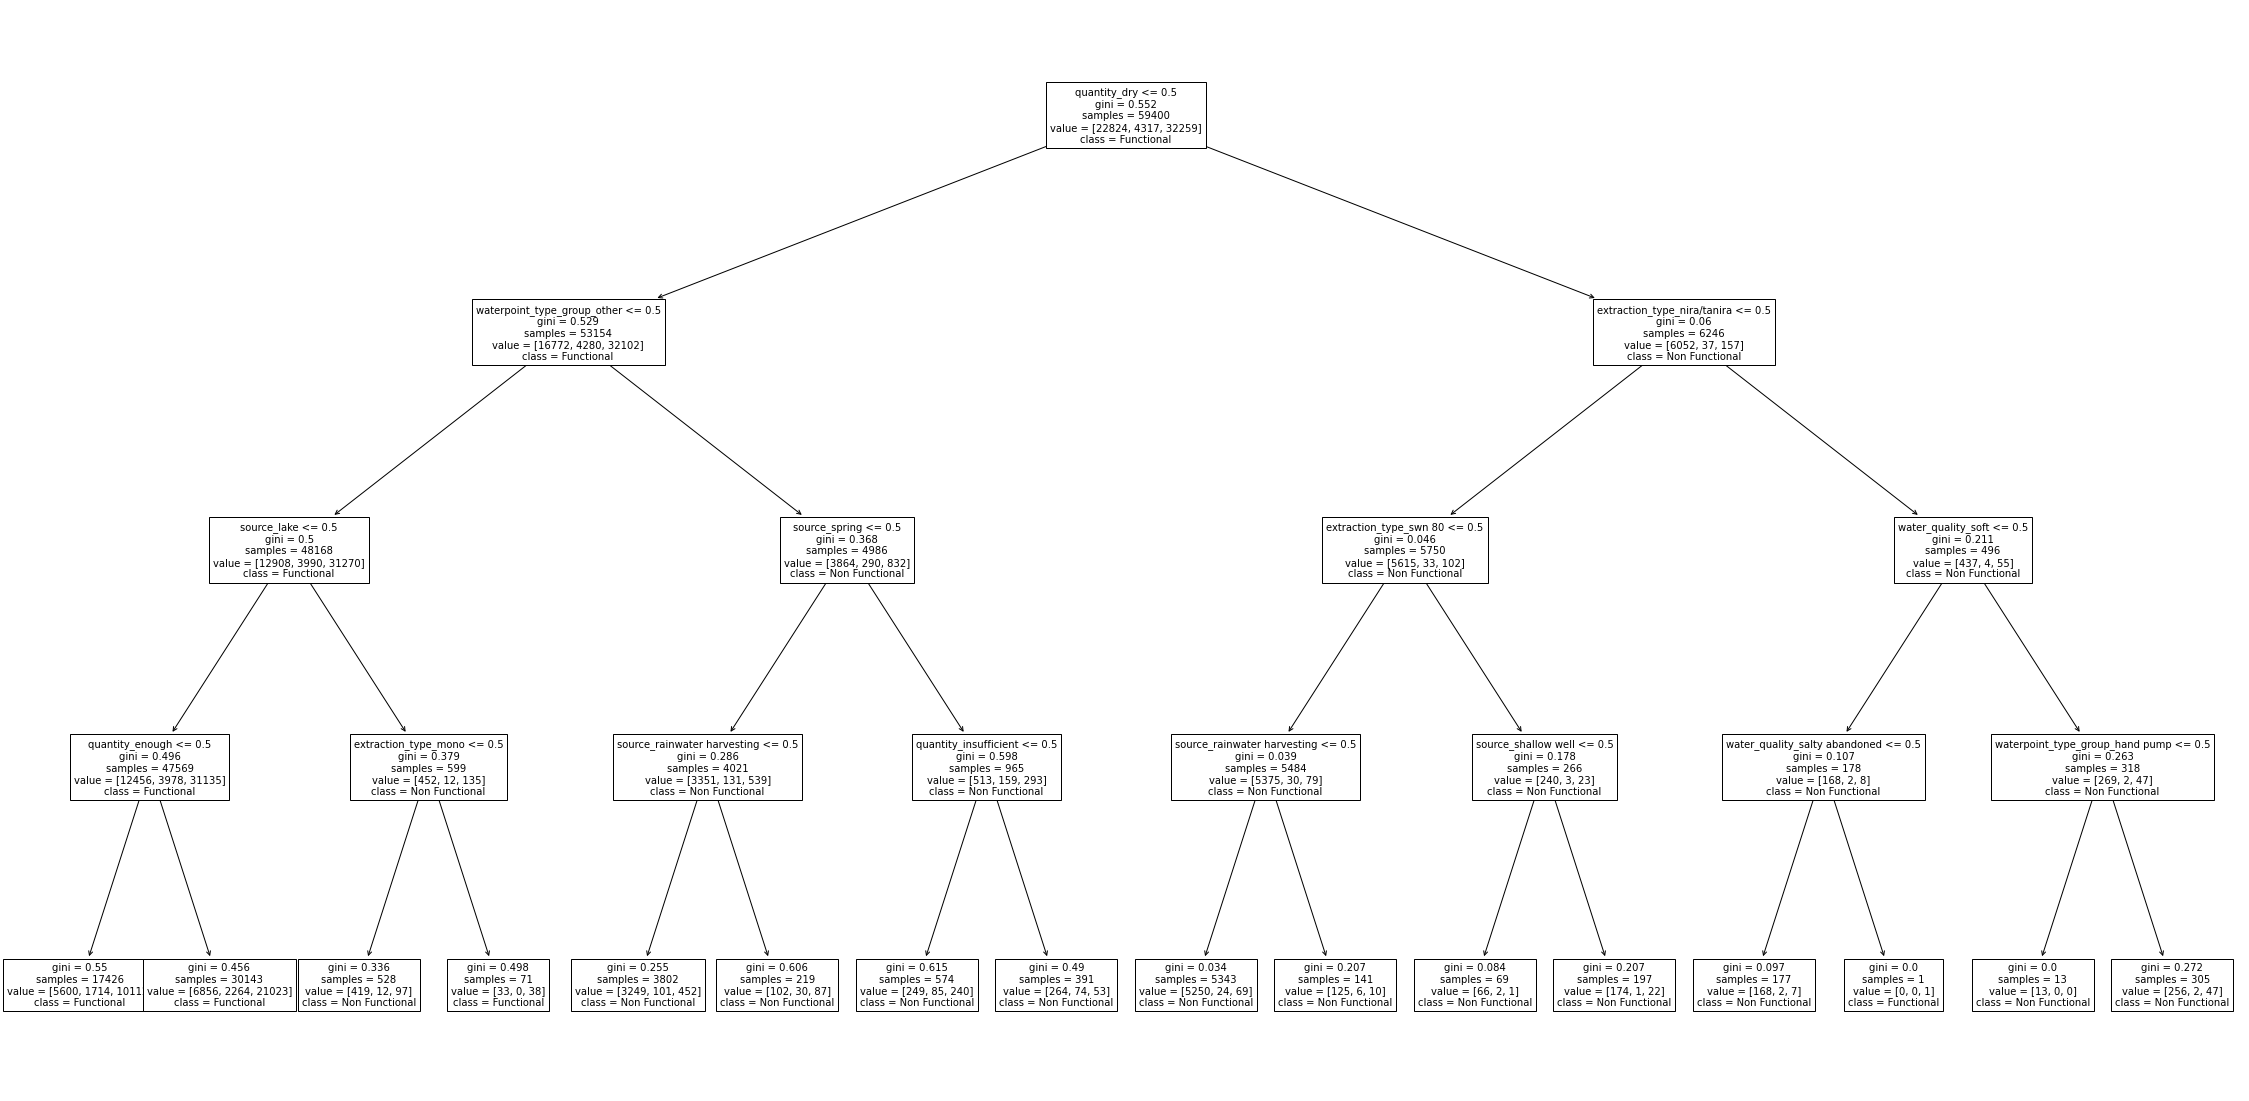

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20)) # Size in inches
tree.plot_tree(clf, fontsize=10, feature_names = feature_names, class_names = labels);
plt.show()

As you can see in the decision tree, it is apparent that submersible water pumps are less likely to be functional, as well as dry in terms of levels of water. Ultimately, man made waterpumps are less likely to be as effective as natural water. 